In [46]:
import numpy as np
import pandas as pd
import re
import os
import requests
import matplotlib.pyplot as plt

import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize

from wordcloud import WordCloud, STOPWORDS 

In [11]:
data = pd.read_csv('data.csv')
data.head()

,label_bullying,text_message
0,0,yeah I got 2 backups for all that. I just hate...
1,0,I hate using my BB but love my iPhone. Haven'...
2,1,Get fucking real dude.
3,1,She is as dirty as they come and that crook ...
4,1,why did you fuck it up. I could do it all day...


In [45]:
data.groupby(['label_bullying']).size()

label_bullying
0    6312
1    2505
dtype: int64

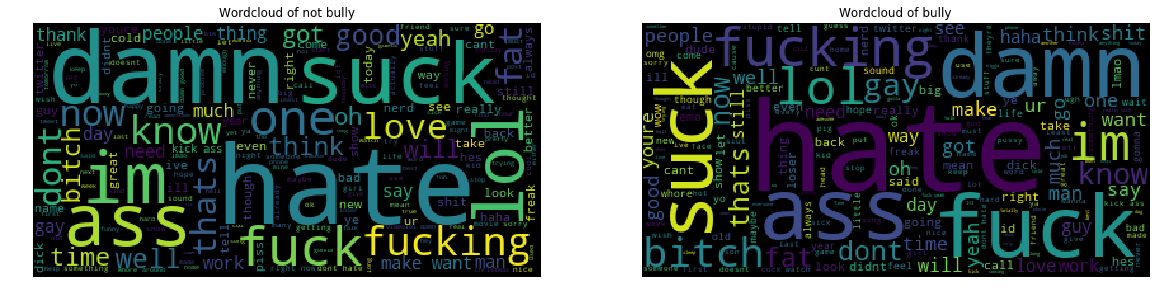

In [42]:
total_bully = ''
total_non_bully = ''

stop_words = set(stopwords.words('english'))

for index, row in data.iterrows():

    sent = row['text_message']
    sent = sent.replace('\n','')                                # Remove new lines
    sent = sent.replace('\t',' ')                               # Remove tabs
    sent = re.sub(r'http\S+', '', sent, flags=re.MULTILINE)     # Remove urls
    sent = re.sub(r'[^\w\s]','', row['text_message'])           # Remove punctuations
    sent = sent.lower().strip()                                 # Case folding
    if int(row['label_bullying']) == 0:
        total_non_bully += sent + ' '
    else:
        total_bully += sent + ' '

fig, (ax1, ax2) = plt.subplots(1,2,figsize=(20,10))
wordcloud_nobully = WordCloud(stopwords = STOPWORDS).generate(total_non_bully)
wordcloud_bully = WordCloud(stopwords = STOPWORDS).generate(total_bully)
ax1.imshow(wordcloud_nobully)
ax1.set_title('Wordcloud of not bully')
ax2.imshow(wordcloud_bully)
ax2.set_title('Wordcloud of bully')
ax1.axis("off")
ax2.axis("off")
plt.show()